# Computer modeling of the Eden Growth
Dawid Woś, Michał Czerepaniak

Faculty of Physics, University of Warsaw, Poland

dd.wos@student.uw.edu.pl

m.czerepaniak@student.uw.edu.pl










# KPZ equation and Eden growth



The KPZ equation is a partial differential equation that describes the growth of a rough surface over time. It is  widely used in statistical physics and has applications in a variety of fields, including biology, materials science, and economics. It is named after Mehran Kardar, Giorgio Parisi, and Yi-Cheng Zhang. The KPZ equation has the form [1]:

$$\frac{\partial}{\partial t} h(\vec{x}, t) = \nu \nabla^2 h + \frac{\lambda}{2} (\nabla h)^2 + \eta(\vec{x}, t) $$

Where $h$ is the height field, $\nu$ and $\lambda$ are parameters of the model and $\eta$ is the white Gaussian noise.

It was found through numerical simulations by Family and Vicsek [2] that the thickness $\sigma_L$ of the surface of solution of the KPZ equation, defined as:
$$\sigma_L = \sqrt{\sum_i (h_i(\vec{x_i},t) - \bar{h}(t))^2}$$

has to fulfill the following scaling relation:
$$\sigma_L(t) \propto L^\alpha f(t/L^\gamma)$$

with

$$f(u) \propto \begin{cases} const & \text{if $u \gg 1$} \\ u^\beta & \text{if $u \ll 1$} \end{cases}$$

where L is the width of the considered physical system, $\alpha$, $\beta$ and $\gamma$ are critical exponents for (1+1) dimensional growth characterizing the KPZ universality class. The exact values of these exponents can be deduced assuming the scalability of the solution of the KPZ equation. Assuming that the $h(x, t)$ is a solution of the KPZ equation, one can take its rescaled form:
$$h_{\epsilon} = \epsilon^{\alpha} h(\epsilon^{-1} x, \epsilon^{\gamma}t)$$

Substituting it to the proper equation yields
$$\frac{\partial}{\partial t} h_{\epsilon} = \frac{1}{2} \lambda \epsilon^{2 - \gamma - \alpha}\left(\frac{\partial}{\partial x} h_{\epsilon} \right)^2 + \nu \epsilon^{2 - \gamma}\frac{\partial^2}{\partial x^2} h_{\epsilon} + \epsilon^{\alpha - \gamma/2 + 1/2} \eta$$

Where the invariance of the white noise has been used. To keep the probability distribution of the possible configurations of the surface unchanged $\alpha$ has to be equal $1/2$. In order to preserve the degree of nonlinearity of the equation, $\gamma$ must equal to $3/2$. Such values of $\alpha$ and $\gamma$ will ensure that the behavior of the system being modeled will not be misrepresented after rescaling. The scaling $h \propto \epsilon^{-\alpha}$ and $t \propto \epsilon^{-\gamma}$ yields the relation $h \propto t^{\beta}$, where $\beta:= \alpha / \gamma$. That directly determines the behavior of short time solutions of the KPZ equation. In fact, the determined exponents are identical for all processes lying in the KPZ universality class [3] in (1+1) dimension.



The Eden growth model is a mathematical model used to study the growth of clusters of particles or cells. It was introduced by Murray Eden in 1961 [4] as a model for the growth of for example bacterial colonies. In the Eden growth model, particles are added one at a time to a lattice, and each particle is placed randomly on the lattice with a probability of sticking to the cluster if it has at least one occupied neighboring cell. Several models of choosing the growing site have been proposed.


Via the renormalization group KPZ equation is conjectured to be the field theory of the Eden growth model.

The aim of the project is to estimate the critical exponents for the Eden growth model and compare the results to theoretical predictions from KPZ equation which are:



1.   $\alpha = 1/2$
2.   $\beta = 1/3$
3.   $\gamma = 3/2$

By estimating the critical exponents and comparing them to theoretical predictions, it will be possible to gain insight into the behavior of the Eden growth.





# Considered models

Throughout our study we have examined two variations of the Eden growth model. Both models were implemented in (1+1) dimensions, and were studied in both linear and radial geometries.


First of these models has been called *Neighbour draw model*. The model consists of the following steps:


1.   Identify the neighbors of the filled cells, which are referred to as seeds, using the Von Neumann neighborhood definition. The Von Neumann neighborhood of a cell is a set of points on the surface that are adjacent to the cell, including the north, south, east, and west neighbors.
2.   Choose one of the identified neighbours at random with uniform probability.
3.   Transform the chosen neighbour into a seed.


This process can be repeated to simulate the growth of the cluster or surface over time. The steps of the Neighbor draw model are illustrated in the following figure:




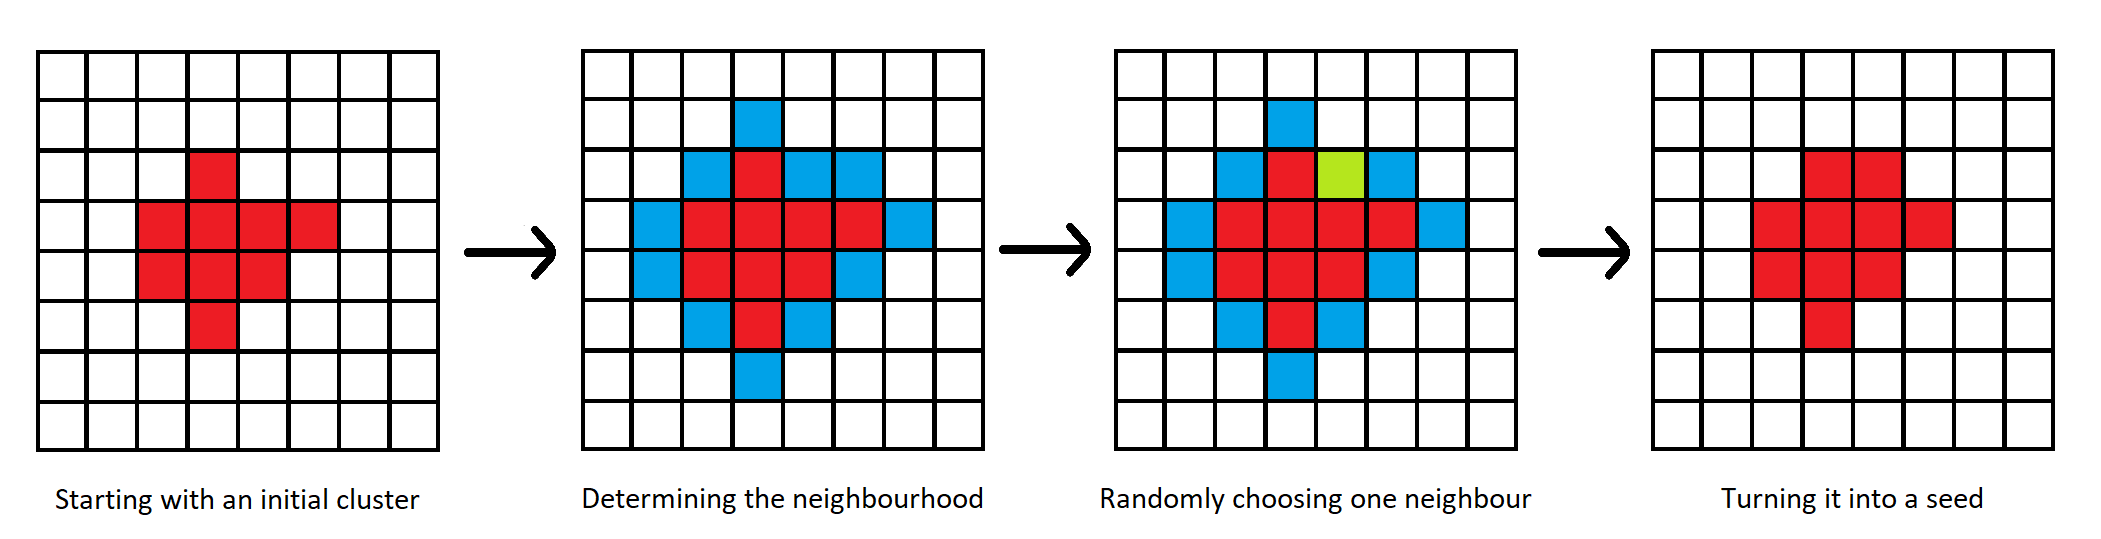

The numerical implementation of the aforementioned model is presented in the following block:





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import ndimage

class Model1:
  # Neighbour draw model

  def __init__(self, L, model):
    if(model == 'radial'):
      # inital conditions for radial model
      self.array = np.zeros((L, L))
      self.array[L//2][L//2] = 2

    elif(model == 'linear'):
      # inital conditions for linear model
      self.array = np.zeros((L, L))
      self.array[-1] = 2
    else:
      print('INVALID MODEL')

    self.L = L # size of the system
    self.quantification = 'NOT QUANTIFIED'
    self.model = model
    self.iteration = 0

  def __von_neumann_neigh(self):
    # function cannot be called outside of this class
    # function returns neighbourhood of the cluster in the Von Neumann sense
    result = np.sum([np.roll(self.array, shift = i, axis = j)
            for i in [-1,1] for j in [0,1]], 0)
    result = np.where(self.array != 0, 0, result) # remove cells of init lattice
    result = np.where(result > 0, 1, 0) # ignore duplicating neighbours
    return result

  def grow_step(self, m = 1):
    # single growth step
    # the function has to be called many times until the desired
    # cluster size is reached
    try:
      self.iteration += 1
      neighs = (self.__von_neumann_neigh()).astype('int') # finding neighbours
      if(self.model == 'linear'):
        # blocking the possibility of rising from the top in the linear model
        neighs[0] = 0
      neighs_indices = np.where(neighs == 1)
      number = len(neighs_indices[0]) # number of neighbours
      while True:
        # choosing a neighbour for a new seed, while a one is chosen m times
        # where in default m = 1
        index = np.random.randint(0, number)
        point = (neighs_indices[0][index], neighs_indices[1][index])
        neighs[point] += 1
        if(np.any(neighs > m - 1)):
          break
      self.array[point] = 2 # filling the chosen cell
    except:
      self.array[0][0] = -1000
      self.iteration = -1000
      print('SIZE EXCEEDED')

  def __radii(self):
    # function cannot be called outside of this class
    # calculating the radius of the radial cluster for every point on the
    # boundary, ignoring the holes inside the cluster
    L = len(self.array)
    array = ndimage.binary_fill_holes(self.array) # filling holes in the cluster
    neighs = [np.roll(array, shift = i, axis = j)
            for i in [-1,1] for j in [0,1]]
    # boundary of the cluster
    array = np.where((array == 1) * (np.sum(neighs,0)<4))

    R = [] # list storing radii values
    central = np.array([L//2,L//2]) # central point
    points = [np.array([array[0][i],
                        array[1][i]]) for i in range(len(array[0]))]

    for point in points:
      # calculate euqlidean distance for the boundary points from the center
      dist = ((central[0] - point[0])**2 + (central[1] - point[1])**2)**0.5
      R.append(dist)
    return R

  def __radii2(self):
    # function cannot be called outside of this class
    # calculating the radius of the radial cluster for every point on the
    # boundary, without ignoring the holes inside the cluster
    L = len(self.array)
    array = np.where(self.array, 1, 0)
    neighs = [np.roll(array, shift = i, axis = j)
            for i in [-1,1] for j in [0,1]]
    # boundary of the cluster
    array = np.where((array == 1) * (np.sum(neighs,0)<4))

    R = [] # list storing radii values
    central = np.array([L//2,L//2]) # central point
    points = [np.array([array[0][i],
                        array[1][i]]) for i in range(len(array[0]))]

    for point in points:
      # calculate euqlidean distance for the boundary points from the center
      dist = ((central[0] - point[0])**2 + (central[1] - point[1])**2)**0.5
      R.append(dist)
    return R

  def __heights(self):
    # function cannot be called outside of this class
    # it measures heights of a linear cluster for each column
    # starting from the very top of the system
    H = len(self.array) # height of the system
    hs = []
    for i in range(H):
      column = self.array[:,i]
      h = 0
      for j in range(H):
        if(column[j] == 2):
          break # go to next column when encounter cluster
        h+=1
      hs.append(H - h)
    return hs # return the list of heights

  def __heights2(self):
    # function cannot be called outside of this class
    # it measures heights of a linear cluster for each column
    # starting from the very bottom of the system
    H = len(self.array) # height of the system
    hs = []
    for i in range(H):
      column = self.array[:,i]
      h = 0
      for j in range(H):
        if(column[-1 - j] == 0):
          break # go to next column when encounter empty cell
        h+=1
      hs.append(h)
    return hs # return the list of heights

  def quantify(self):
    # quantification using __radii and __heights
    if(self.model == 'radial'):
      result = self.__radii()
    elif(self.model == 'linear'):
      result = self.__heights()

    self.quantification = result

  def quantify2(self):
    # quantification using __radii2 and __heights2
    if(self.model == 'radial'):
      result = self.__radii2()
    elif(self.model == 'linear'):
      result = self.__heights2()

    self.quantification = result

The resulting clusters of this model are illustrated in the following figures:


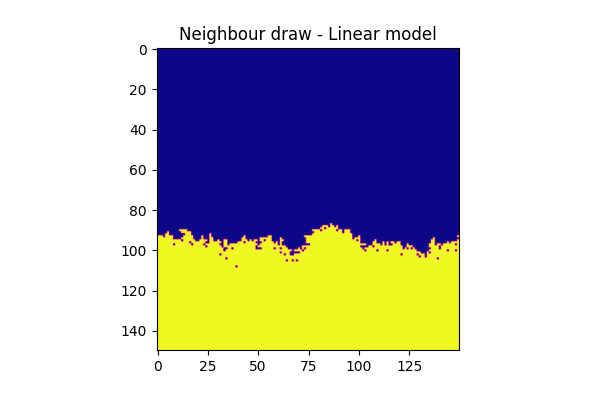

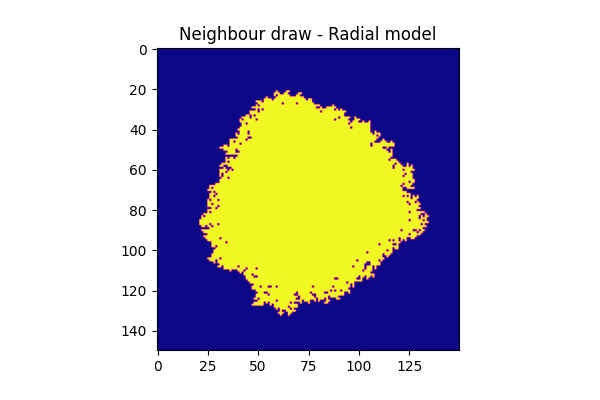

The second of the models has been called *Seed draw model*. The model consists of the following steps:



1.   Choose a seed cell randomly with uniform probability.
2.   Identify the Von Neumann neighbourhood of the chosen seed.
3.   Choose randomly one of the neighbours with uniform probability.
4.   Transform the chosen neighbour into a seed.



The steps of the Seed draw model are illustrated in the following figure:


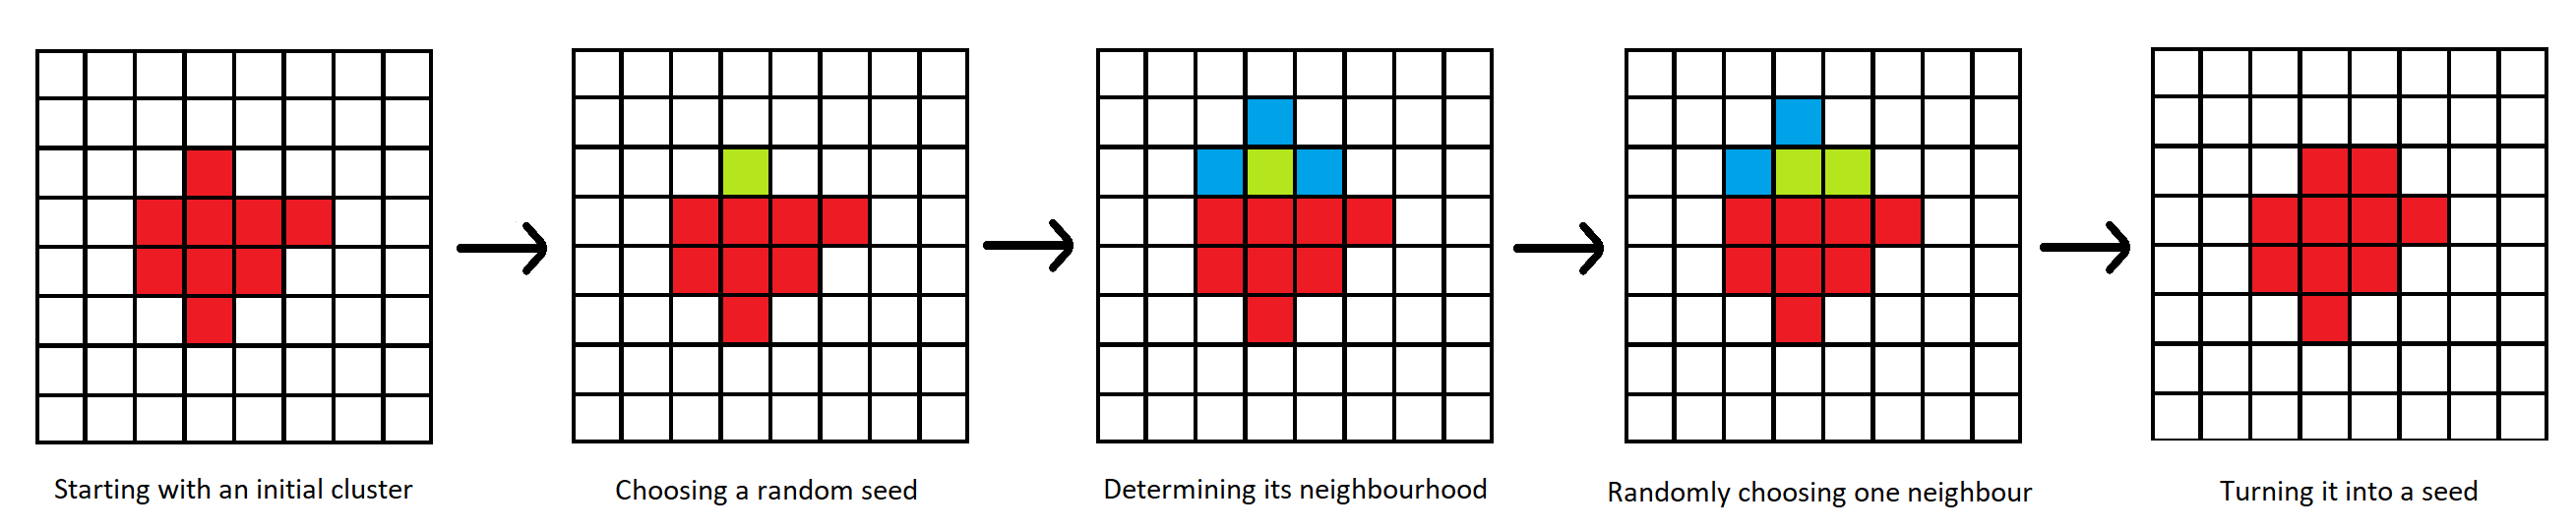

The numerical implementation of the aforementioned model is presented in the following block:

In [ ]:
class Model2:
  # Seed draw model

  def __init__(self, L, model):
    if(model == 'radial'):
      # inital conditions for radial model
      self.array = np.zeros((L, L))
      self.array[L//2][L//2] = 2

    elif(model == 'linear'):
      # inital conditions for linear model
      self.array = np.zeros((L, L))
      self.array[-1] = 2
    else:
      print('INVALID MODEL')

    self.L = L # size of the system
    self.quantification = 'NOT QUANTIFIED'
    self.model = model
    self.iteration = 0

  def __von_neumann_neigh(self, lattice):
    # function cannot be called outside of this class
    # function returns neighbourhood of the cluster in the Von Neumann sense
    result = np.sum([np.roll(lattice, shift = i, axis = j)
            for i in [-1,1] for j in [0,1]], 0)
    result = np.where(lattice != 0, 0, result) # remove cells of init lattice
    result = np.where(result > 0, 1, 0) # ignore duplicating neighbours
    return result

  def  grow_step(self):
    # single growth step
    # the function has to be called many times until the desired
    # cluster size is reached
    try:
      self.iteration += 1
      k = 0
      l = self.L
      while(k == 0):
        seed_indices = np.where(self.array == 2)
        number = len(seed_indices[0]) # number of seeds
        # seed draw
        index = np.random.randint(0, number)
        point = (seed_indices[0][index], seed_indices[1][index])
        # auxilliary lattice
        lattice = np.zeros((l, l))
        lattice[point[0], point[1]] = 2
        cand = self.__von_neumann_neigh(lattice) # candidates for a growth
        if(self.model == 'linear'):
          # blocking the possibility of rising from the top in the linear model
          cand[0] = 0
        cand_indices = np.where((cand == 1) * (self.array != 2) * \
                                (self.array != -1)) # indices of candidates
        if len(cand_indices[0]) == 0:
          self.array[point[0], point[1]] = -1


        else:
          # choosing a random candidate for chosen seed
          k=1
          cand_index = np.random.randint(0,len(cand_indices[0]))
          cand_point = (cand_indices[0][cand_index],
                        cand_indices[1][cand_index])
          self.array[cand_point] = 2
      self.array = self.array.astype(int)
    except:
      self.array[0][0] = -1000
      self.iteration = -1000
      print('SIZE EXCEEDED')

  def __radii(self):
    # function cannot be called outside of this class
    # calculating the radius of the radial cluster for every point on the
    # boundary, ignoring the holes inside the cluster
    L = len(self.array)
    array = ndimage.binary_fill_holes(self.array) # filling holes in the cluster
    neighs = [np.roll(array, shift = i, axis = j)
            for i in [-1,1] for j in [0,1]]
    # boundary of the cluster
    array = np.where((array == 1) * (np.sum(neighs, 0)<4))

    R = [] # list storing radii values
    central = np.array([L//2,L//2]) # central point
    points = [np.array([array[0][i],
                        array[1][i]]) for i in range(len(array[0]))]

    for point in points:
      # calculate euqlidean distance for the boundary points from the center
      dist = ((central[0] - point[0])**2 + (central[1] - point[1])**2)**0.5
      R.append(dist)
    return R

  def __radii2(self):
    # function cannot be called outside of this class
    # calculating the radius of the radial cluster for every point on the
    # boundary, without ignoring the holes inside the cluster
    L = len(self.array)
    array = np.where(self.array, 1, 0)
    neighs = [np.roll(array, shift = i, axis = j)
            for i in [-1,1] for j in [0,1]]
    # boundary of the cluster
    array = np.where((array == 1) * (np.sum(neighs,0)<4))

    R = [] # list storing radii values
    central = np.array([L//2,L//2]) # central point
    points = [np.array([array[0][i],
                        array[1][i]]) for i in range(len(array[0]))]

    for point in points:
      # calculate euqlidean distance for the boundary points from the center
      dist = ((central[0] - point[0])**2 + (central[1] - point[1])**2)**0.5
      R.append(dist)
    return R

  def __heights(self):
    # function cannot be called outside of this class
    # it measures heights of a linear cluster for each column
    # starting from the very top of the system
    H = len(self.array) # height of the system
    hs = []
    for i in range(H):
      column = self.array[:,i]
      h = 0
      for j in range(H):
        if(column[j] == 2):
          break # go to next column when encounter cluster
        h+=1
      hs.append(H - h)
    return hs # return the list of heights

  def __heights2(self):
    # function cannot be called outside of this class
    # it measures heights of a linear cluster for each column
    # starting from the very bottom of the system
    H = len(self.array) # height of the system
    hs = []
    for i in range(H):
      column = self.array[:,i]
      h = 0
      for j in range(H):
        if(column[-1 - j] == 0):
          break # go to next column when encounter empty cell
        h+=1
      hs.append(h)
    return hs # return the list of heights

  def quantify(self):
    # quantification using __radii and __heights
    if(self.model == 'radial'):
      result = self.__radii()
    elif(self.model == 'linear'):
      result = self.__heights()

    self.quantification = result

  def quantify2(self):
    # quantification using __radii2 and __heights2
    if(self.model == 'radial'):
      result = self.__radii2()
    elif(self.model == 'linear'):
      result = self.__heights2()

    self.quantification = result

The resulting clusters of this model are illustrated in the following figures:

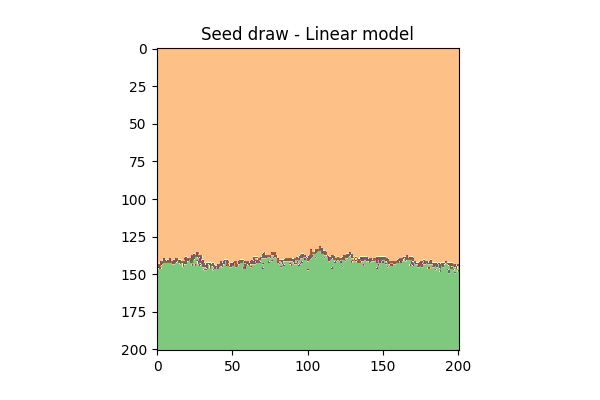

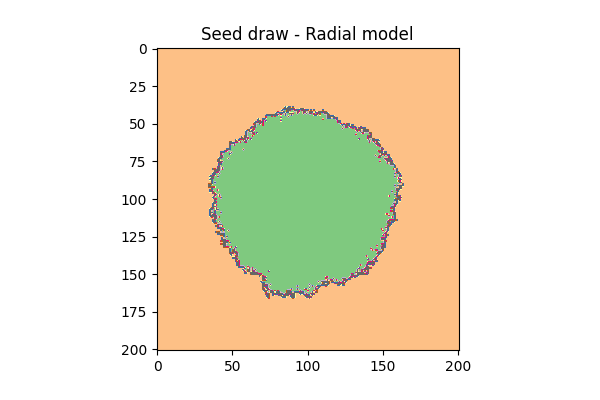

The models effectively differ in the probability of occupancy of their neighbors. In the second model, vacant cells surrounded by seeds have a significantly higher probability of being populated than vacant cells in the vicinity of only one seed. This makes the edge smoother and there are fewer holes in the cluster. In the first model, no vacant cells are favoured.

# Quantification

For each of the models we have measured the average height and radius as well as their standard deviation in function of time of the simulation. The heights and radii have been calculated in two ways:


1.   Heights were calculated from the top of the system (H1) and from its bottom (H2) by counting the number of cells below the first occupied or vacant cell.
2.   Radii were calculated as the euclidean distance of the cluster boundary from its centre, where we considered holes in the cluster as elements of its boundary (R1) or we completely ignored them (R2).

We have observed that the average standard deviation of height and radius are lower in H1 and R1 methods of quantification, with the difference vanishing for large simulation times. For all of the methods, the average height grew linearly with simulation time. The example results the neighbour draw model are presented in the following figures:


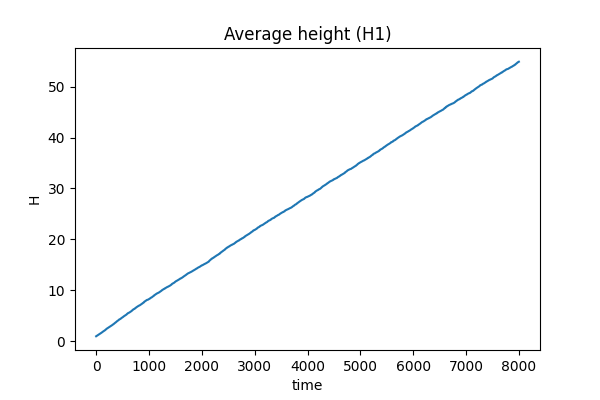



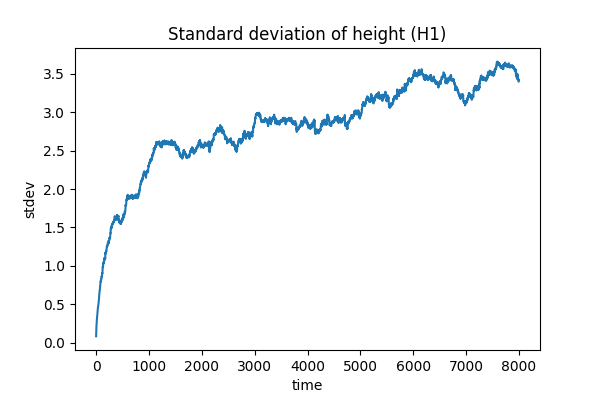

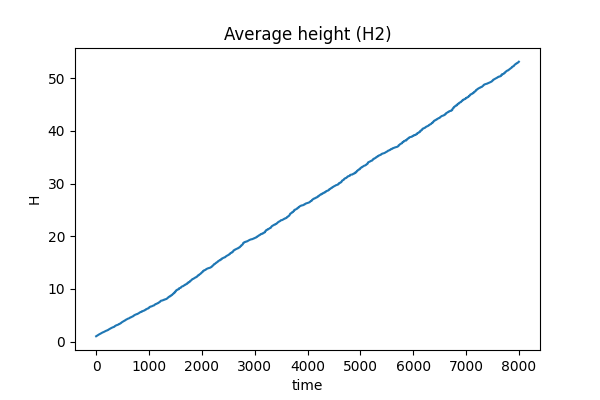

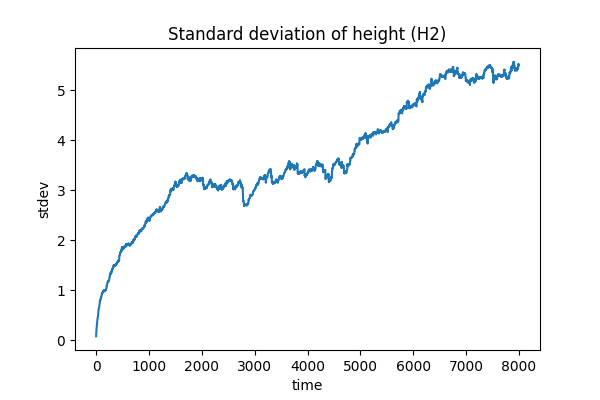

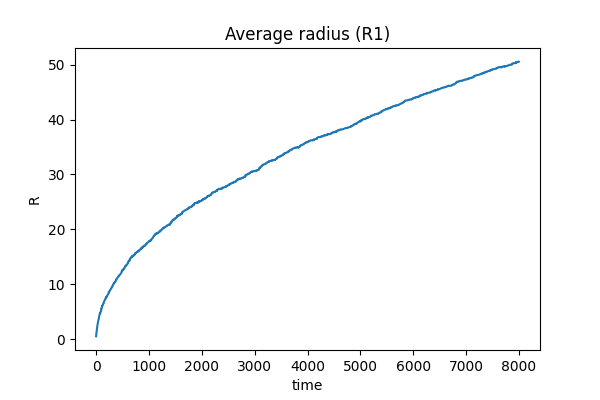

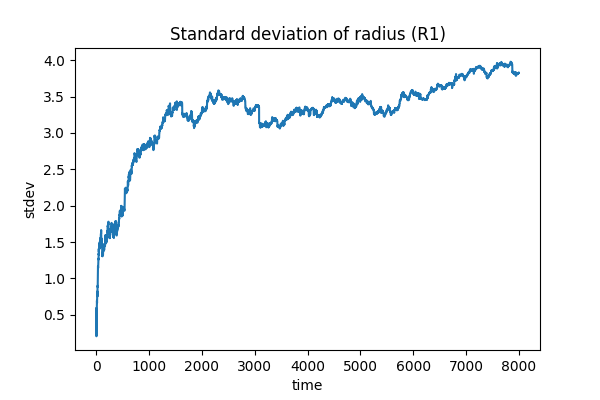

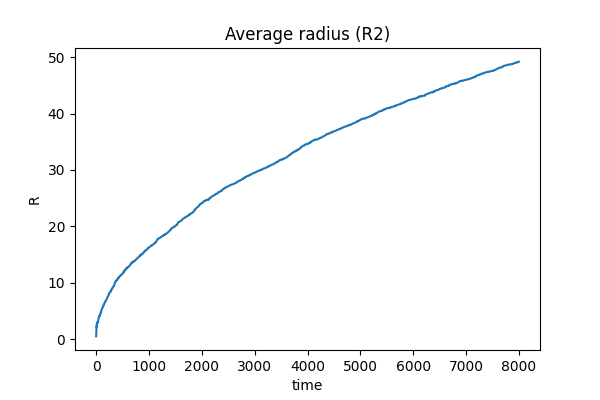

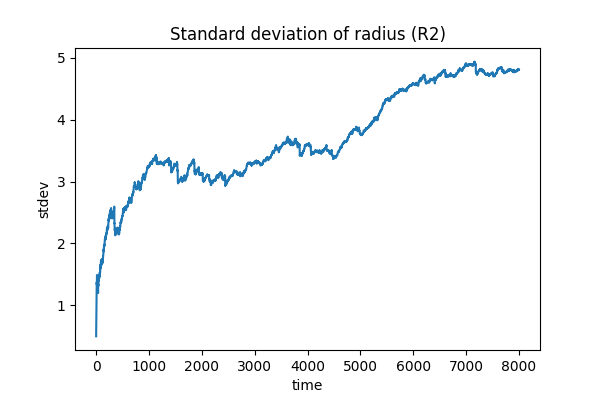

# Critical exponents

The critical exponents for the model have been determined for the linear case with the neighbour draw. Several parameters have been introduced in order to determine all $\alpha$, $\beta$ and $\gamma$ exponents. First of these was the $L$ parameter describing the width of the system and average height $h$ defined as the ratio $\frac{T}{L}$ where $T$ is the number of epochs equivalent to the number of occupied cells in the cluster. As described before, the behavior of $\sigma_L$ is dependent on the magnitude of $h$ in respect to the value of $L$. For the regime $h \gg L$ the behavior $\sigma_L \propto L^{\alpha}$ has been expected. Therefore we considered the clusters of different widths $L$, of maximal heights equal to $40L$. We averaged the value of $\sigma_L$ over the last $10\%$ of epochs of the simulation. Eventually we have fitted the function $\sigma_L = kL^{\alpha}$ for the obtained results, illustrated by the following figure:

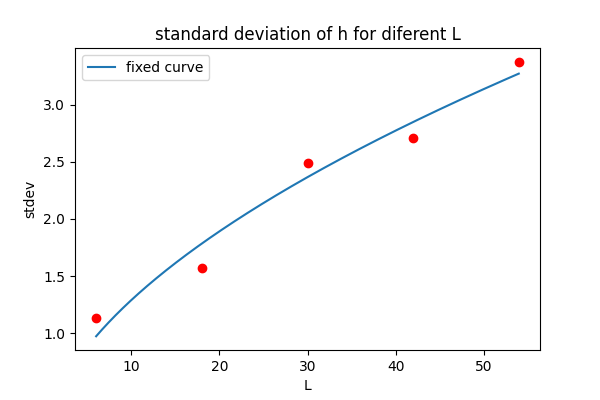

The obtained value of $\alpha$ was $0.55 \pm 0.08$ which is consistent with the theoretical predictions within the three-sigma rule.


The value of the $\beta$ parameter has been calculated in the regime of $h \ll L$. In this regime the behavior $\sigma_L \propto h^{\beta}$ has been expected. In order to determine the exponent the simulation has been run for several values of $L$ with the maximal value of $h$ equal to $\frac{1}{6}L$. For each $L$ the value of $\sigma_L$ has been calculated for the maximal $h$ and averaged over $15$ runs. The function $\sigma_L = q(\frac{1}{6}L)^{\beta}$ has been fitted to the obtained results, which is illustrated by the following figure:

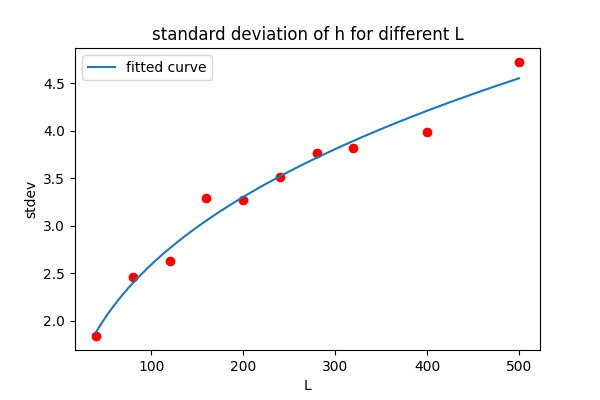

The obtained value of $\beta$ was $0.35 \pm 0.03$ which is consistent with the theoretical predictions within the three-sigma rule.


From the obtained results one can determine the value of the $\gamma$ exponent using its direct definition $\gamma := \alpha / \beta$. The resulting value of this parameter is $1.57 \pm 0.31$ which is also consistent with the theoretical predictions within the three-sigma rule. The error of the $\gamma$ value has been determined using the exact differential. The error is relatively large which is caused by a small number of simulation results as well as the averaging over a small number of simulation runs. The results could be potentially improved by running longer simulations for larger systems.  

The obtained value of $\sigma_L$ was eventually rescaled to determine if the model adheres to the predictions of the KPZ equation for all values of $L$ and converges to the same value for all $L$. The following rescaling has been performed:
$$\sigma_L \rightarrow \sigma_L / L^{\beta}$$
$$h \rightarrow 6h/L$$


After rescaling, it was observed that for sufficiently large h, the sigma value converges to the same value for all L. It has been illustrated on the following figure:


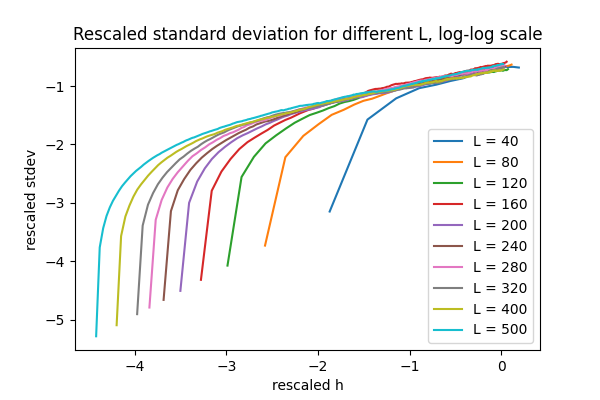

# Summary

The aim of the project has been achieved. Initially two models were prepared to better understand the nature of Eden's growth. For both of them linear and radial models were prepared. Afterwards, the neighbour draw linear model was chosen for further consideration.

The next question was how to measure the cluster's height. It was shown that measurements from above and from the bottom give similar results for big timescales. Afterwards the heights and their standard deviations were obtained.

It was shown that according to the KPZ equation, height's standard deviation should behave in a specific way for big and small timescales. It should be dictated by the critical exponents, which were determined to be $\alpha = 0.55 \pm 0.08$, $\beta= 0.35 \pm 0.03$ and $\gamma = 1.57 \pm 0.31$ .

# References

1.   M. Kardar, G. Parisi, Y. Zhang Phys. Rev. Lett. 56, 889 (1986)
2.   F. Family, T. Vicsek, J. Phys. A: Math. Gen. 18: L75-L81 (1985)
3.   J. Quastel, H. Spohn, arXiv:1503.06185 (2015)
4.   M. Eden (1961). A Two-dimensional Growth Process.
5.   F. Manin, E. Roldan, B. Schweinhart, arXiv:2005.12349 (2020)

